## Assignment-A1 Univariant Linear Regression on feature "incidenceRate"
@author: Kai-Ping Wang

## Importing the libraries
Import all required libraries, and also set some libraries options.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

## Importing the dataset

In [2]:
file_url = 'https://raw.githubusercontent.com/aso-uts/applied_ds/master/assignment1/cancer_reg.csv'
df = pd.read_csv(file_url, encoding='ISO-8859-1')

## Checking the dataset
Check the data structure and information to be sure if data processing is required

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [4]:
df.describe(include='all')

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047,3047.000000,3047.000000,3047.000000,3047,3047.000000,3047.000000,3047.000000,3047.000000,762.000000,3047.000000,3047.000000,3047.000000,2895.000000,3047.000000,3047.000000,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,3047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[22640, 34218.1]",NaN,NaN,NaN,"Cottle County, Texas",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,306,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,NaN,45.272333,39.570725,42.145323,NaN,2.479662,51.773679,18.224450,35.002068,40.977034,6.158287,34.804660,13.282015,54.152642,7.852412,64.354939,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,NaN,45.304480,5.226017,5.292849,NaN,0.429174,6.896928,8.093064,9.069722,11.115805,4.529059,7.034924,5.394756,8.315064,3.452371,10.647057,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,NaN,22.300000,22.400000,22.300000,NaN,0.022100,23.100000,0.000000,0.000000,7.100000,0.000000,7.500000,2.500000,17.600000,0.400000,22.300000,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,NaN,37.700000,36.350000,39.100000,NaN,2.370000,47.750000,12.800000,29.200000,34.000000,3.100000,30.400000,9.400000,48.600000,5.500000,57.200000,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,NaN,41.000000,39.600000,42.400000,NaN,2.500000,52.400000,17.100000,34.700000,40.400000,5.400000,35.300000,12.300000,54.500000,7.600000,65.100000,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,NaN,44.000000,42.500000,45.300000,NaN,2.630000,56.400000,22.700000,40.700000,46.400000,8.200000,39.650000,16.100000,60.300000,9.700000,72.100000,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677


## Run Linear Regression
Run the univariant linear regression on incidenceRate against TARGET_deathRate. 

Then print out the score and MSE, and also draw the diagram of ground truth and prediction model.

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
reg = LinearRegression()
y = df[['TARGET_deathRate']]
X = df[['incidenceRate']]
reg.fit(X,y)
print("Score is %.4f" % reg.score(X,y))
y_pred = reg.predict(X)
print("MSE is %.4f" % mse(y, y_pred))

Score is 0.2020
MSE is 614.3837


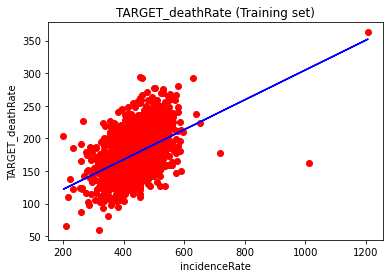

In [6]:
plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred, color = 'blue')
plt.title('TARGET_deathRate (Training set)')
plt.xlabel('incidenceRate')
plt.ylabel('TARGET_deathRate')
plt.show()

## Clean up outlier
From previous diagram, we can see some outliers (incidenceRate > 800). Let's remove them and try again to see if it improves the prediction model MSE.

In [7]:
df_cleaned = df[df.incidenceRate < 800]

## Run Linear Regression again
Run the univariant linear regression on incidenceRate against TARGET_deathRate. 

Then print out the score and MSE, and also draw the diagram of ground truth and prediction model.

We expect to see a better outcome then previous model

In [8]:
reg2 = LinearRegression()
y2 = df_cleaned[['TARGET_deathRate']]
X2 = df_cleaned[['incidenceRate']]
reg2.fit(X2,y2)
print("Score is %.4f" % reg2.score(X2,y2))
y_pred2 = reg.predict(X2)
print("MSE is %.4f" % mse(y2, y_pred2))

Score is 0.1997
MSE is 607.7555


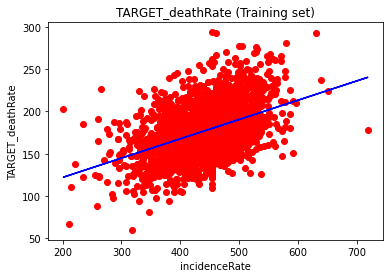

In [9]:
plt.scatter(X2, y2, color = 'red')
plt.plot(X2, y_pred2, color = 'blue')
plt.title('TARGET_deathRate (Training set)')
plt.xlabel('incidenceRate')
plt.ylabel('TARGET_deathRate')
plt.show()